In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [3]:
sns.set_context('poster')
sns.set_style('white')

In [4]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['X', 'P', 's', 'D', 'o']
aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'
e2_color= '#f2f2f2'
eallorder= ['e1','e2', 'e3', 'e4', 'e5', 'e6']
eallpallete = ['#6cf0ba', '#f2f2f2', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']

efcmorder= ['e1','e2', 'e4', 'e5', ]
efcmpallete = ['#6cf0ba', '#f2f2f2',  '#eeb7cb', '#b9d2d8',]

espallete = ['#6cf0ba', '#D55282', '#538B9B']
#  604 #FCC479
#     #ffd7a1
#     #fcb14c
#     MED4 = #62A586
#     9313 #F47681
#     natl #7A9BC8

In [5]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

espallete = ['#6cf0ba', '#D55282', '#538B9B']

In [6]:
xlsx_fname = 'Yara All exp. analysis.xlsx'


In [7]:
y = pd.read_excel(xlsx_fname, sheet_name=None, index_col=0, header=None)

In [8]:
def _process(k,d):
    df = d.T
    df['sheet_name'] = k
    mdf =pd.melt(df, id_vars = ['Day', 'sheet_name', 'Date'], var_name='Sample', value_name='FL')
    
    return mdf

df = pd.concat([_process(k, y[k]) for k in y])

In [9]:
df

,Day,sheet_name,Date,Sample,FL
0,0,Secondary exp.,2021-05-03 13:22:00,MED4 Pro99 1,0.386
1,2.788194,Secondary exp.,2021-05-06 08:17:00,MED4 Pro99 1,1.137
2,5.827083,Secondary exp.,2021-05-09 09:13:00,MED4 Pro99 1,4.415
3,8.005556,Secondary exp.,2021-05-11 13:30:00,MED4 Pro99 1,6.881
4,9.860417,Secondary exp.,2021-05-13 10:01:00,MED4 Pro99 1,7.752
...,...,...,...,...,...
508,42.125694,lowN-lowP exp.,2021-03-22 13:53:00,9312- lowN/lowP Pro99+,0.211
509,49.841667,lowN-lowP exp.,2021-03-30 07:04:00,9312- lowN/lowP Pro99+,0.109
510,51.878472,lowN-lowP exp.,2021-04-01 07:57:00,9312- lowN/lowP Pro99+,0.106
511,55.920139,lowN-lowP exp.,2021-04-05 08:57:00,9312- lowN/lowP Pro99+,0.111


In [10]:
df.Sample.unique()

array(['MED4 Pro99 1', 'MED4 Pro99 2', 'MED4 Pro99 3', 'MED4 lowN 1',
       'MED4 lowN 2', 'MED4 lowN 3', 'MED4 lowP (1:8) 1',
       'MED4 lowP (1:8) 2', 'MED4 lowP (1:8) 3', 'MED4 lowP (1:50) 1',
       'MED4 lowP (1:50) 2', 'MED4 lowP (1:50) 3',
       'MED4 lowN/lowP (1:8) 1', 'MED4 lowN/lowP (1:8) 2',
       'MED4 lowN/lowP (1:8) 3', 'MED4 lowN/lowP (1:50) 1',
       'MED4 lowN/lowP (1:50) 2', 'MED4 lowN/lowP (1:50) 3',
       '9313Pro99 1', '9313Pro99 2', '9313Pro99 3', '9313lowN 1',
       '9313lowN 2', '9313lowN 3', '9313lowP (1:8) 1', '9313lowP (1:8) 2',
       '9313lowP (1:8) 3', '9313lowP (1:50) 1', '9313lowP (1:50) 2',
       '9313lowP (1:50) 3', '9313lowN/lowP (1:8) 1',
       '9313lowN/lowP (1:8) 2', '9313lowN/lowP (1:8) 3',
       '9313lowN/lowP (1:50) 1', '9313lowN/lowP (1:50) 2',
       '9313lowN/lowP (1:50) 3', ' MED4 lowN 1', ' MED4 lowN 2',
       ' MED4 lowN 3', ' MED4 lowP(1:50) 1', ' MED4 lowP(1:50) 2',
       ' MED4 lowP(1:50) 3', ' MED4 Pro99 1', ' MED4 Pro99 

In [11]:
df = df.rename(columns={'Day': 'day'})

In [12]:
df.isna().sum()

day           0
sheet_name    0
Date          0
Sample        0
FL            0
dtype: int64

In [13]:
def calculate_lag(d):
    minday_fl_threshold = 0.1
    r2_threshold = 0.9
    reg = None 
    intercept = None
    coef = None
    r2 = -1000 
    L = None
    maxday = None
    maxFL = None

    d = d.reset_index(drop=True)
    if d.shape[0] > 2:
        maxindex = d.FL.idxmax()
        maxday = d.loc[maxindex]['day']
        maxFL = d.loc[maxindex]['FL']
        minday = d.loc[(d.day < maxday) & (d.FL <= minday_fl_threshold), 'day'].max()
        if minday is np.NaN:
            minday = d.day.min()

        minday = min(maxday-7,minday)
        dfit = d.loc[(d.day > minday) & (d.day <= maxday)]
        if dfit.shape[0] > 2:
            reg, intercept, coef, r2 = cp.fit_regression(dfit, 'day', 'logFL')

            L = maxday - ((d.loc[maxindex]['logFL'] - d.loc[0]['logFL']) / coef)
    return pd.Series({
         'maxday' : maxday,
#         'minday' : minday,
         'maxFL' : maxFL,
#         'logFL0' : d.loc[0]['logFL'],
#         'log10FL0' : np.log10(d.loc[0]['FL']),
        'intercept': intercept,
        'Growth Rate': coef,
        'r2': r2,
        'Lag' : L,
    })

def get_prev_max_day_df(d, minmaxday_threshold):
    d = d.reset_index(drop=True)
    if d.shape[0] < 3:
        return None
    
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    maxdaysdf = d.loc[(d.FL > d.FL.shift()) & (d.FL > d.FL.shift(-1)) & 
                    (d.day < maxday)].reset_index(drop=True)
    if maxdaysdf.shape[0] > 0:
        newmaxindex = maxdaysdf.FL.idxmax()
        newmaxday = maxdaysdf.loc[newmaxindex]['day']

        if ((newmaxday is not np.NaN) and #(newmaxday >= minmaxday_threshold) and 
            (d.loc[d.day == newmaxday, 'FL'].max() > (d.FL.max() / 2))):
            df_prevmax = d.loc[d.day < newmaxday]
            return df_prevmax
    return None

def get_no_outlier_df(d, minday_fl_threshold):
    d_no_outlier = d.loc[(d.FL > minday_fl_threshold) | 
                         (d.FL.shift() < minday_fl_threshold*2) |
                         (d.FL.shift(-1) < minday_fl_threshold*2)
                        ]
    return d_no_outlier

def get_without_max_df(d):
    d = d.reset_index(drop=True)
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    d_withoutmaxday = d.loc[d.day < maxday]
    return d_withoutmaxday

def get_decline_df(d):
    d = d.reset_index(drop=True)
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    d_withoutmaxday = d.loc[d.day > maxday]
    return d_withoutmaxday

def get_decline_rate(d):
    minday_fl_threshold = 0.1
    r2_threshold = 0.9
    reg = None 
    intercept = None
    coef = None
    r2 = -1000 
    L = None
    maxday = None
    maxFL = None

    d = d.reset_index(drop=True)
    if d.shape[0] > 2:
        maxindex = d.FL.idxmax()
        maxday = d.loc[maxindex]['day']
        maxFL = d.loc[maxindex]['FL']

        dfit = d.loc[(d.day >= maxday)]
        if dfit.shape[0] > 2:
            reg, intercept, coef, r2 = cp.fit_regression(dfit, 'day', 'logFL')

    return pd.Series({
        'decline_intercept': intercept,
        'Decline Rate': -coef,
        'decline r2': r2,
    })

def get_df_list(d, minday_fl_threshold, minmaxday_threshold):
    df_list = [d]
    try:
        dnomax = get_without_max_df(d)
        df_list.append(dnomax)
        dnomax2 = get_without_max_df(dnomax)
        df_list.append(dnomax2)
        df_list1 = df_list.copy()
        for x in df_list1:
            df_list.append(get_no_outlier_df(x, minday_fl_threshold))
    except Exception:
        pass

    return df_list

def calculate_lag_wrap(d):
    minday_fl_threshold = 0.07
    minmaxday_threshold = 4
    df_list = get_df_list(d, minday_fl_threshold, minmaxday_threshold)
    d2 = get_prev_max_day_df(d,minmaxday_threshold)
    if d2 is not None:
        df_list.extend(get_df_list(d2, minday_fl_threshold, minmaxday_threshold))
    reslist = [calculate_lag(x) for x in df_list]

    sorted_reslist = sorted(reslist, key=lambda x : x['r2'], reverse=True)
    print('.', end='')
    result = sorted_reslist[0]           
    
    maxindex = d.FL.idxmax()
    result['maxday'] = d.loc[maxindex]['day']
    result['maxFL'] = d.loc[maxindex]['FL']
    result = pd.concat([result, get_decline_rate(get_decline_df(d))])

    return result           

In [14]:
def computeL(maxday, maxlogcells, logcells0, coef):
    L = maxday - ((maxlogcells - logcells0) / coef)
    return L


In [15]:
def computeMaxDay(maxlogcells, logcells0, coef, L):
    maxday = ((maxlogcells - logcells0) / coef) + L
    return maxday


In [16]:
df.columns

Index(['day', 'sheet_name', 'Date', 'Sample', 'FL'], dtype='object')

In [17]:
df.dropna(axis=0, subset=['FL'], inplace=True)

In [18]:
df['FL'] = pd.to_numeric(df['FL'])

In [19]:
df['FL'] = np.clip(df['FL'], a_min=0.04, a_max=None)

In [20]:
df['logFL'] = np.log(df['FL'])

In [21]:
df.isna().sum()

day           0
sheet_name    0
Date          0
Sample        0
FL            0
logFL         0
dtype: int64

In [22]:
df.loc[df.day.isna()]

,day,sheet_name,Date,Sample,FL,logFL


In [23]:
lagsdf = df.groupby([ 'sheet_name', 'Sample']).apply(calculate_lag_wrap)\
        .reset_index()

.........................................................................................................

In [24]:
lagsdf.head()

,sheet_name,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag,decline_intercept,Decline Rate,decline r2
0,Bottle exp.,MED4 lowN 1,17.034722,2.407,-4.508700,0.351982,0.976490,4.857721,6.136358,0.266838,0.960523
1,Bottle exp.,MED4 lowN 2,14.797917,2.889,-3.194192,0.257620,0.857066,2.417114,3.518536,0.166913,0.959839
2,Bottle exp.,MED4 lowN 3,14.797917,3.177,-2.918618,0.256941,0.888865,2.810380,4.697872,0.254585,0.992533
3,Bottle exp.,MED4 lowP(1:50) 1,14.797917,0.855,-3.472785,0.272223,0.999904,4.764836,0.712101,0.075195,0.953862
4,Bottle exp.,MED4 lowP(1:50) 2,9.861111,0.925,-2.372779,0.169814,0.986327,-0.017796,0.815924,0.093193,0.980497


In [25]:
lagsdf.to_excel('yara_growth_rates.xlsx')

In [26]:
lagsdf.describe()

,maxday,maxFL,intercept,Growth Rate,r2,Lag,decline_intercept,Decline Rate,decline r2
count,105.000000,105.000000,100.000000,100.000000,105.000000,100.000000,105.000000,105.000000,105.000000
mean,8.459193,3.341686,-1.477330,0.338163,-46.685889,-0.962158,0.526970,0.086470,0.669745
std,3.136455,2.053098,0.878404,0.117703,214.189909,7.580762,2.269228,0.072445,0.254493
min,0.000000,0.439000,-4.508700,0.037545,-1000.000000,-56.085670,-3.218876,-0.000000,0.153117
25%,5.827083,1.356000,-1.967993,0.282514,0.968228,-0.016848,-1.472644,0.038207,0.432305
50%,8.147917,2.923000,-1.414433,0.338742,0.991312,0.025896,0.418405,0.069557,0.736696
75%,10.047917,4.976000,-0.847350,0.397084,0.997112,0.714902,1.970393,0.093642,0.873639
max,22.170139,8.009000,0.457546,0.812972,0.999996,9.692681,7.015959,0.363013,1.000000


In [27]:
lagsdf.nlargest(20, 'maxFL')

,sheet_name,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag,decline_intercept,Decline Rate,decline r2
96,lowN-lowP exp.,MED4- lowN/lowP Pro99 +,10.047917,8.009,0.457546,0.184356,0.991312,1.441926,3.711265,0.115472,0.935986
61,Secondary exp.,MED4 Pro99 2,9.860417,7.755,-1.006068,0.428135,0.996619,-0.008431,2.222639,0.047474,0.818088
60,Secondary exp.,MED4 Pro99 1,9.860417,7.752,-0.981706,0.418628,0.998358,0.005870,2.660608,0.072533,0.959216
62,Secondary exp.,MED4 Pro99 3,9.860417,7.669,-0.605285,0.331303,0.966918,-3.983531,2.092837,0.045983,0.670861
7,Preliminary exp.,MED4 Pro99 2,10.937500,7.540,-0.541874,0.264557,0.942186,-2.413005,1.883292,0.073083,0.736696
8,Preliminary exp.,MED4 Pro99 3,10.937500,7.055,-0.383484,0.259012,0.940905,-1.678054,1.693200,0.075412,0.700491
16,Preliminary exp.,MED4 lowP (1:8) 2,8.955556,6.965,-0.362512,0.256563,0.934423,-2.895397,2.169975,0.086955,0.865479
10,Preliminary exp.,MED4 lowN 2,7.957639,6.489,-0.928687,0.451475,0.999565,0.011874,0.459487,0.069557,0.652271
17,Preliminary exp.,MED4 lowP (1:8) 3,7.957639,6.375,-0.421473,0.287065,0.993956,-1.155109,2.062372,0.088027,0.853063
6,Preliminary exp.,MED4 Pro99 1,8.955556,6.213,-0.855800,0.370730,0.997587,-0.022674,1.892660,0.080055,0.765442


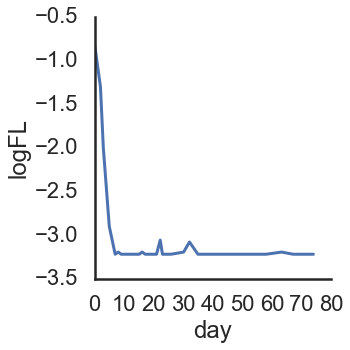

In [28]:
sns.relplot(data=df.loc[df.Sample == ' MED4 lowP (1:50) 3'],
            x='day', y='logFL', kind='line')

In [29]:
lagsdf.Sample.unique()

array([' MED4 lowN 1', ' MED4 lowN 2', ' MED4 lowN 3',
       ' MED4 lowP(1:50) 1', ' MED4 lowP(1:50) 2', ' MED4 lowP(1:50) 3',
       ' MED4 Pro99 1', ' MED4 Pro99 2', ' MED4 Pro99 3',
       ' MED4 lowP (1:50) 1', ' MED4 lowP (1:50) 2',
       ' MED4 lowP (1:50) 3', ' MED4 lowP (1:8) 1', ' MED4 lowP (1:8) 2',
       ' MED4 lowP (1:8) 3', '9312Pro99 1', '9312Pro99 2', '9312Pro99 3',
       '9312lowN 1', '9312lowN 2', '9312lowN 3', '9312lowP (1:50) 1',
       '9312lowP (1:50) 2', '9312lowP (1:50) 3', '9312lowP (1:8) 1',
       '9312lowP (1:8) 2', '9312lowP (1:8) 3', '9313Pro99 1',
       '9313Pro99 2', '9313Pro99 3', '9313lowN 1', '9313lowN 2',
       '9313lowN 3', '9313lowP (1:50) 1', '9313lowP (1:50) 2',
       '9313lowP (1:50) 3', '9313lowP (1:8) 1', '9313lowP (1:8) 2',
       '9313lowP (1:8) 3', '9313lowN/lowP (1:50) 1',
       '9313lowN/lowP (1:50) 2', '9313lowN/lowP (1:50) 3',
       '9313lowN/lowP (1:8) 1', '9313lowN/lowP (1:8) 2',
       '9313lowN/lowP (1:8) 3', 'MED4 Pro99 1',

In [30]:
lagsdf[['S', 'replicate']] = lagsdf.Sample.str.rsplit(pat=' ', n=1, expand=True)

In [31]:
lagsdf[['PRO']] = lagsdf.Sample.str.slice(stop=4)

In [32]:
lagsdf.head()

,sheet_name,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag,decline_intercept,Decline Rate,decline r2,S,replicate,PRO
0,Bottle exp.,MED4 lowN 1,17.034722,2.407,-4.508700,0.351982,0.976490,4.857721,6.136358,0.266838,0.960523,MED4 lowN,1,MED
1,Bottle exp.,MED4 lowN 2,14.797917,2.889,-3.194192,0.257620,0.857066,2.417114,3.518536,0.166913,0.959839,MED4 lowN,2,MED
2,Bottle exp.,MED4 lowN 3,14.797917,3.177,-2.918618,0.256941,0.888865,2.810380,4.697872,0.254585,0.992533,MED4 lowN,3,MED
3,Bottle exp.,MED4 lowP(1:50) 1,14.797917,0.855,-3.472785,0.272223,0.999904,4.764836,0.712101,0.075195,0.953862,MED4 lowP(1:50),1,MED
4,Bottle exp.,MED4 lowP(1:50) 2,9.861111,0.925,-2.372779,0.169814,0.986327,-0.017796,0.815924,0.093193,0.980497,MED4 lowP(1:50),2,MED


In [33]:
lagsdf.sheet_name.unique()

array(['Bottle exp.', 'Preliminary exp.', 'Secondary exp.',
       'lowN-lowP exp.'], dtype=object)

In [34]:
lagsdf.columns

Index(['sheet_name', 'Sample', 'maxday', 'maxFL', 'intercept', 'Growth Rate',
       'r2', 'Lag', 'decline_intercept', 'Decline Rate', 'decline r2', 'S',
       'replicate', 'PRO'],
      dtype='object')

In [35]:
lagsdf.rename(columns={'Growth Rate'  : 'Growth_Rate'}, inplace=True)

In [36]:
from statsmodels.formula.api import ols
for p in ['9313', 'MED4']:
    for col in ['maxFL', 'Growth_Rate']:
        dfdata = lagsdf.loc[lagsdf.sheet_name.isin(['Secondary exp.']) & lagsdf.PRO.isin([p])]

        mod = ols(f'{col} ~ C(S)',
                data=dfdata).fit()
        #print (f'++++++++++++++++++ day = {d} +++++++++++++++++++++++')
        print(f'+++++++++++++++++++++ {p} {col} as function of sample')
        print(mod.summary())
        print(sm.stats.anova_lm(mod))
        print(f'+++++++++++++++++++++ {p} {col} as function of sample')
        pair_t = mod.t_test_pairwise("C(S)", method='b')
        print(pair_t.result_frame)
        print(f'+++++++++++++++++++++++ {p} {col} as function of sample')
        print(pair_t.result_frame.loc[pair_t.result_frame['reject-b'], 'pvalue-b'])
        #aov_table = sm.stats.anova_lm(mod, typ=2)
        #print(aov_table)

+++++++++++++++++++++ 9313 maxFL as function of sample
                            OLS Regression Results                            
Dep. Variable:                  maxFL   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     690.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           2.51e-14
Time:                        13:56:58   Log-Likelihood:                 26.116
No. Observations:                  18   AIC:                            -40.23
Df Residuals:                      12   BIC:                            -34.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [40]:
dfd = pd.read_excel ('yara Decline rates.xlsx')

In [41]:
dfd

,Sample,decline_rates
0,MED4 Pro99,0.167
1,MED4 Pro99,0.148
2,MED4 Pro99,0.159
3,MED4 lowN,0.297
4,MED4 lowN,0.344
5,MED4 lowN,0.326
6,MED4 lowP (1:8),0.132
7,MED4 lowP (1:8),0.131
8,MED4 lowP (1:8),0.141
9,MED4 lowP (1:50),0.095


In [43]:
dfd.Sample.str.startswith('12')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
Name: Sample, dtype: bool

In [45]:
from statsmodels.formula.api import ols
for p in ['MED4', '13', '12']:
    mod = ols(f'decline_rates ~ C(Sample)',
            data=dfd.loc[dfd.Sample.str.startswith(p)]).fit()
    #print (f'++++++++++++++++++ day = {d} +++++++++++++++++++++++')
    print(p)
    print(mod.summary())
    print(sm.stats.anova_lm(mod))
    pair_t = mod.t_test_pairwise("C(Sample)", method='b')
    print(p)

    print(pair_t.result_frame)
    print(p)
    print(pair_t.result_frame.loc[pair_t.result_frame['reject-b'], 'pvalue-b'])
    #aov_table = sm.stats.anova_lm(mod, typ=2)
    #print(aov_table)

MED4
                            OLS Regression Results                            
Dep. Variable:          decline_rates   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           1.26e-06
Time:                        14:02:44   Log-Likelihood:                 33.820
No. Observations:                  11   AIC:                            -59.64
Df Residuals:                       7   BIC:                            -58.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept

C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
